# Exploring the dataset

Based on huggings-face website, we load the dataset as a pandas object.

In [46]:
import pandas as pd

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/uoft-cs/cifar10/" + splits["train"])

Let's explore it

In [53]:
df.shape

(50000, 2)

In [49]:
df.head()

,img,label
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,0
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,6
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,0
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,2
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,7


Images are saved into bytes in this object.

In [51]:
df.at[0, "img"]

{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x02\x00\x00\x00\xfc\x18\xed\xa3\x00\x00\x07\xf2IDATx\x9cuVK\xaf\x1dG\x11\xae\xaa~\xcc\x9c93\xe7u\x1f\xc1\xdc\xc4B\x04\x84\x12\xc7B\x8a\x14\x89-\x12\x88\x9f\xc2\x86\x1d\x7f\x0c\xc1\x82\x15\x1b\x04R\xd8$\x04\t)Qb\xcc\xb5\xe3\xd8\xf7^\x9f\xc7\x9c3g\xa6\xa7\xbb\xab\x8a\xc5\xc1\xc6\x89D\xab\xd5\xaa\xae\xae\xfe\xbe\xaf\xba[\xa5\xc6\xdf\xff\xeeO\xf0\xaa!"\x80\x02("\xc2\xffo\xaa\xfa\xa6\xf1j\xaa\xaap\xea""\xc2"\xcc\xcc\x96\x88T_!""(\x80\xbe\t\xf7\x1d\xb2\xd7\xc1\xff\xdb\xf5\x06\x93*\xa8"""\xeai\xd12\xf3\xb7Q\xf4M@D\x14\x11DP\x85\xd3\x08\x00\x88 \'K\xbf\x9b\xc7\xc9-\xa2"""\xaaJ\xaf\xe3\x00\x00QO:N\xd0)\xa5\xae\xebN+\xaf\xe8\x90E\x86!\xf4}\x7f<\xf6\'Y\xdf\x12\xf7\xdf\x13V":\xf9\xed)\xd31\x84\xedn\xc3*\x97\x17\x97\xde9U\xcd\x9c_\xdc\xdeL\'\xd5t:=Q\x8a\xc8I\xe9\xdd\xfaew<.\xe7\x8biU1\xf3k\x02\x01P\xe1\xcdf\xdd\xb6\xedjy6\xadk\x00\xb0\x08\x18S\xfc\xea\xf1\xa3\'\xcf\x9e(\xc0O\x1f<\xbc\xba\xf7}2\xb4\xdb\xb7\x8f\xaf\xaf\x7f\

# Data exploration

The labels seem to be well distributed.

In [55]:
df.groupby("label").count()

,img
label,
0,5000
1,5000
2,5000
3,5000
4,5000
5,5000
6,5000
7,5000
8,5000


From huggingsface website, we know that we have the correspondances : 


In [64]:
labels_to_names = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird", 
    3 : "cat", 
    4 : "deer", 
    5 : "dog", 
    6 : "frog", 
    7 : "horse", 
    8 : "ship", 
    9 : "truck"
}


Let's have a look at randomly selected images :

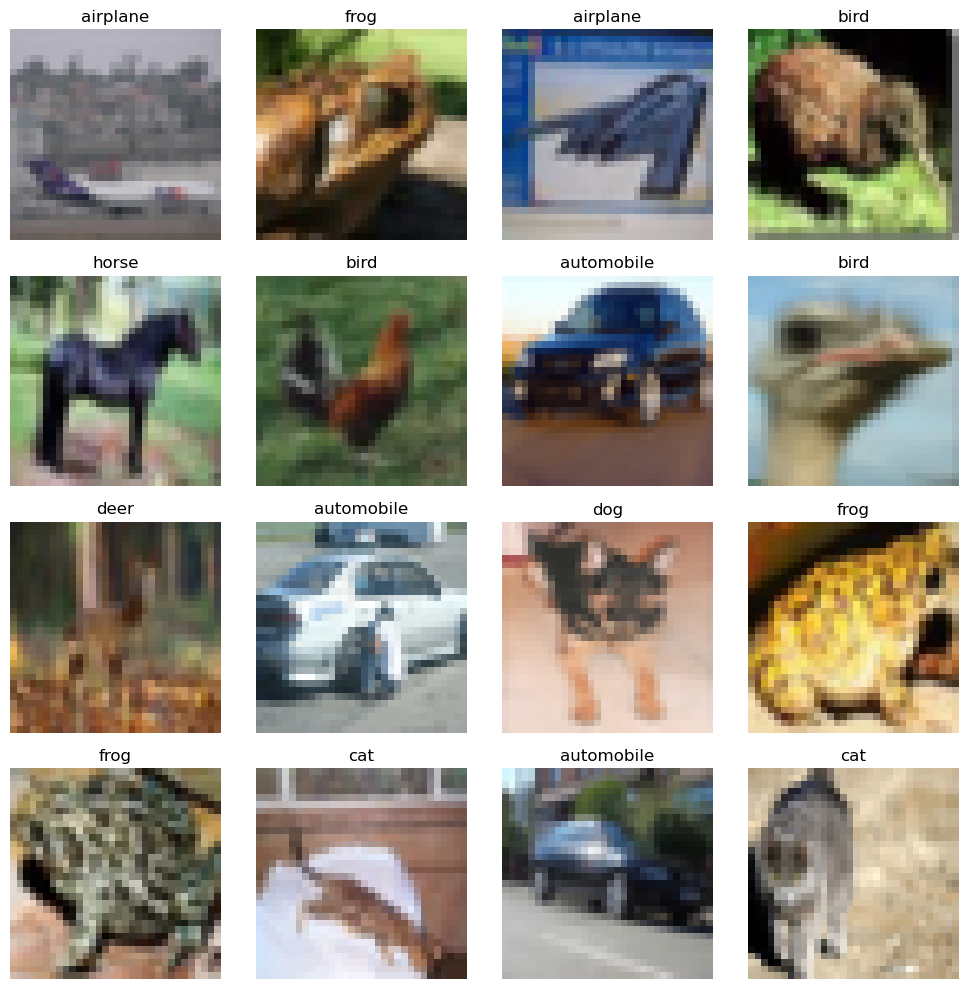

In [74]:
import PIL
import io
import random

def bytes_to_image(byte_data):
    return Image.open(io.BytesIO(byte_data))

#Create a random sequence of indeces
seed=42

random.seed(seed)
n = len(df)
k = 4*4

random_sequence = random.sample(range(n), k)

#Create the grid for images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten() 

# Plot images on the grid with respective labels
for i, ax in enumerate(axes):
    if i < len(random_sequence):
        # Convert bytes to image and display
        img = bytes_to_image(df.at[i, 'img']["bytes"])
        ax.set_title(labels_to_names[df.at[i, "label"]])
        ax.imshow(img)
    ax.axis('off')  

#Plot the grid
plt.tight_layout()
plt.show()


Labels seem to correspond on this subset. We will trust the large community using this dataset.

# Some statistics on the images